In [ ]:
# Sarah Burg
# Machine Learning
# CS379
# Due date: 4/9/23
# Unit 1 - Individual Project

In [ ]:
# UNSUPERVISED ALGORITHM
# Description: This program will prodict if a passenger survived the Titanic.

In [ ]:
# Importing libraries.

# Pandas is used for data manipulation and analysis.
import pandas as pd

# NumPy is used for working with multidimensional array objects.
import numpy as np

# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
# Pyplot is a MATLAB-styled interface.
import matplotlib.pyplot as plt

# Seaborn is used for data visualization.
import seaborn as sns

In [ ]:
# Loading titanic dataset from github.
data = pd.read_csv('https://raw.githubusercontent.com/qlik-oss/sse-r-plugin/master/sense_apps/R_DecisionTree/Titanic_data.csv')

In [ ]:
# Displaying the head and the tail of the dataset.
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,"211,34"
1,2,1,1,male,"0,9167",Child,"151,55"
2,3,1,0,female,2,Child,"151,55"
3,4,1,0,male,30,Adult,"151,55"
4,5,1,0,female,25,Adult,"151,55"
...,...,...,...,...,...,...,...
1304,1305,3,0,female,"14,5",Child,"14,45"
1305,1306,3,0,female,NaN,Adult,"14,45"
1306,1307,3,0,male,"26,5",Adult,"7,22"
1307,1308,3,0,male,27,Adult,"7,22"


In [ ]:
# Displaying dataset description.
data.describe()

,ID,pclass,survived
count,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.381971
std,378.020061,0.837836,0.486055
min,1.000000,1.000000,0.000000
25%,328.000000,2.000000,0.000000
50%,655.000000,3.000000,0.000000
75%,982.000000,3.000000,1.000000
max,1309.000000,3.000000,1.000000


In [ ]:
# Displaying dataset information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1309 non-null   int64 
 1   pclass    1309 non-null   int64 
 2   survived  1309 non-null   int64 
 3   sex       1309 non-null   object
 4   age       1046 non-null   object
 5   age_b     1309 non-null   object
 6   fare      1308 non-null   object
dtypes: int64(3), object(4)
memory usage: 71.7+ KB


In [ ]:
# Replaces commas in the age and fare string with peroids/decimals.
data.age = data.age.str.replace(',','.')
data.fare = data.fare.str.replace(',','.')
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2,Child,151.55
3,4,1,0,male,30,Adult,151.55
4,5,1,0,female,25,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5,Adult,7.22
1307,1308,3,0,male,27,Adult,7.22


In [ ]:
# Converting age and fare object to float.
data.age = data.age.astype(float)
data.fare = data.fare.astype(float)
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


In [ ]:
# Checking for null values.
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

In [ ]:
# Replacing the null values with 0.
data.fillna(0)

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,0.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


In [ ]:
# Checking for null values again.
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

In [ ]:
# Checking dataset information again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   survived  1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   age_b     1309 non-null   object 
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [ ]:
mask = (data['age_b'] == 'Adult')
data.loc[data['age'].isnull() & mask, 'age'] = data.age.median()

mask = (data['age_b'] == 'Child')
data.loc[data['age'].isnull() & mask, 'age'] = 9

data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,28.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


In [ ]:
# Checking null values.
data.isnull().sum()

ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        1
dtype: int64

In [ ]:
# Replacing fare null value with 0.
data['fare'] = data['fare'].fillna(data['fare'].median())

In [ ]:
# Checking to make sure null values are 0.
data.isnull().sum()

ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        0
dtype: int64

In [ ]:
# Checking survived count. 0 means fatality and 1 means survived.
survived = data.groupby('survived').survived.count()
survived

survived
0    809
1    500
Name: survived, dtype: int64

In [ ]:
# Finding the percentage of survived and fatality.
percent_survived = (survived / len(data)) * 100
percent_survived

survived
0    61.802903
1    38.197097
Name: survived, dtype: float64

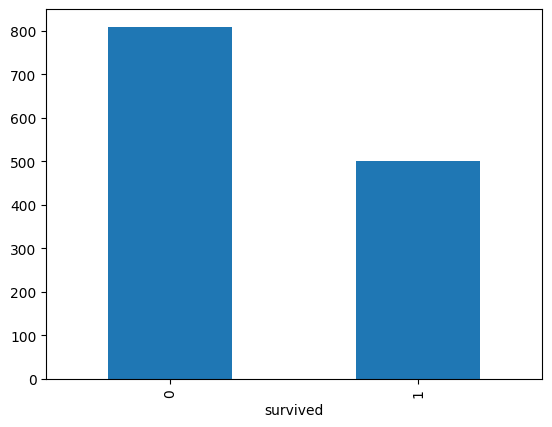

In [ ]:
# Creating visual for survived and fatality.
data.groupby('survived').survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# Checking sex count.
sex = data.groupby('sex').survived.count()
sex

sex
female    466
male      843
Name: survived, dtype: int64

In [ ]:
# Checking sex percentage.
percent_sex = (sex / len(data)) * 100
percent_sex

sex
female    35.599694
male      64.400306
Name: survived, dtype: float64

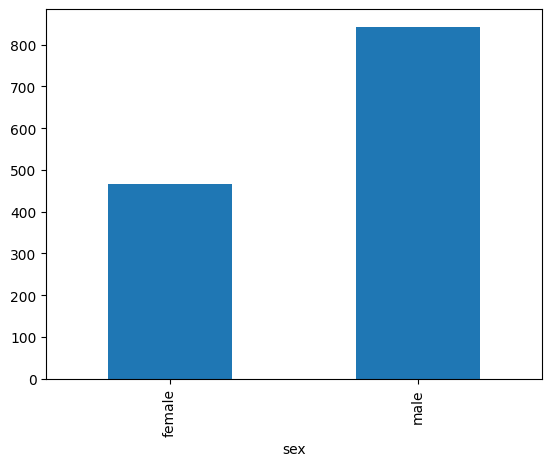

In [ ]:
# Creating visual for sex count.
data.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# Checking passenger class count. 1 is 1st class, 2 is 2nd class, and 3 is 3rd class.
pclass = data.groupby('pclass').survived.count()
pclass

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

In [ ]:
# Checking passenger class percentage.
percent_class = (pclass / len(data)) * 100
percent_class

pclass
1    24.675325
2    21.161192
3    54.163484
Name: survived, dtype: float64

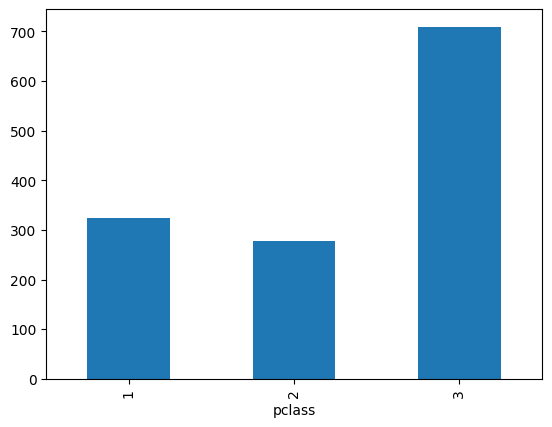

In [ ]:
# Creating visual for passenger class count.
data.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# Checking adult and child count.
age_b = data.groupby('age_b').survived.count()
age_b

age_b
Adult    1200
Child     109
Name: survived, dtype: int64

In [ ]:
# Checking adult and child percentage.
percent_age = (age_b / len(data)) * 100
percent_age

age_b
Adult    91.673033
Child     8.326967
Name: survived, dtype: float64

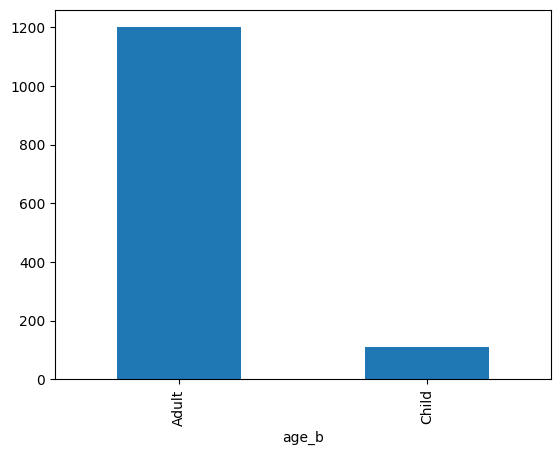

In [ ]:
# Creating visual for adult and child count.
data.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

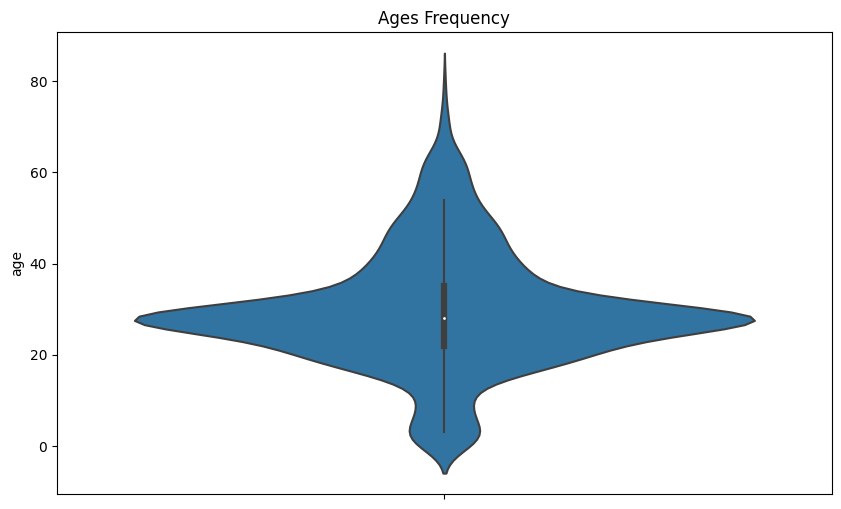

In [ ]:
# Visual of age count. There were alot of passengers in there 20s and 30s.
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["age"])
plt.show()

In [ ]:
# Checking what the maximum age a passenger was.
max_age = data.age.max()
max_age

80.0

In [ ]:
# Checking what the minimum age a passenger was.
min_age = data.age.min()
min_age

0.1667

In [ ]:
# Checking what the medium age a passenger was.
median_age = data.age.median()
median_age

28.0

In [ ]:
# Checking to see what the average age of the passengers were.
most_age = data.age.mode()
most_age

0    28.0
Name: age, dtype: float64

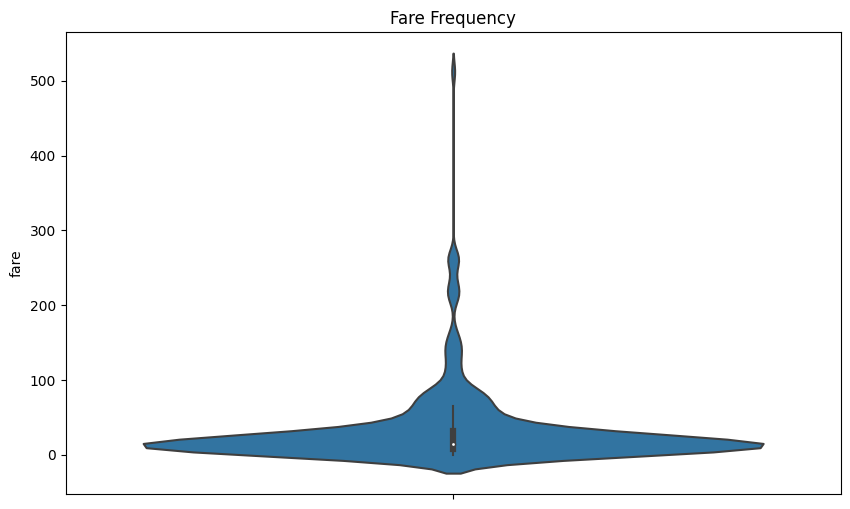

In [ ]:
# Visual of fare prices. A lot of passengers paid less than 50 of whatever currency was used.
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["fare"])
plt.show()

In [ ]:
# Checking to see what the maximum fare rate a passenger paid was.
max_fare = data.fare.max()
max_fare

512.33

In [ ]:
# Checking to see what the minimum fare rate a passenger paid was.
min_fare = data.fare.min()
min_fare

0.0

In [ ]:
# Checking to see what the medium fare rate a passenger paid was.
median_fare = data.fare.median()
median_fare

14.45

In [ ]:
# Checking to see what the average was that passengers paid.
most_fare = data.fare.mode()
most_fare

0    8.05
Name: fare, dtype: float64

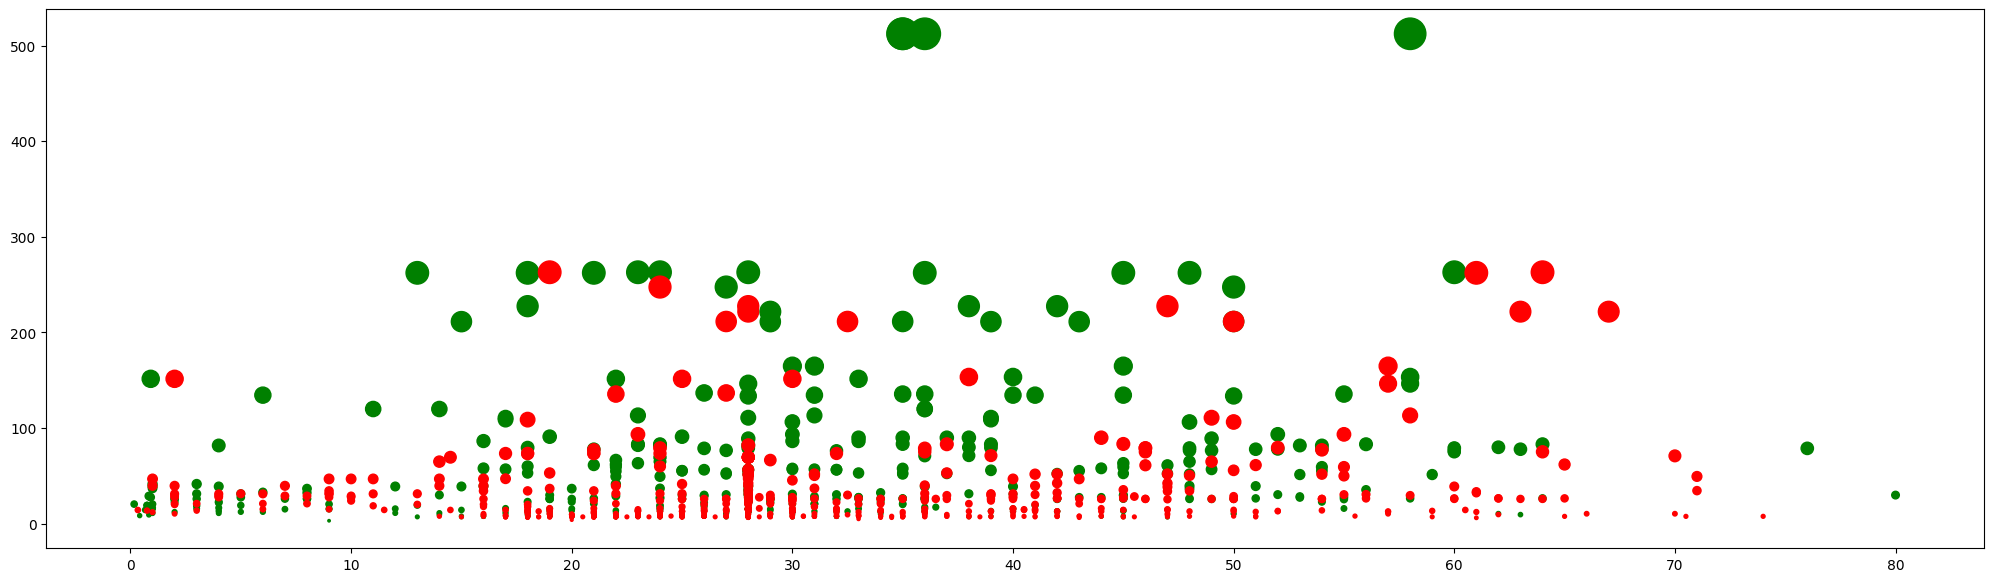

In [ ]:
# Visual figure of passenger survival and fatality. Green means survived and red means fatality.
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], c='green', s=data[data['survived'] == 1]['fare'])
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], c='red', s=data[data['survived'] == 0]['fare']);

In [ ]:
# Filtering survivors from fatality.
include = data[data['survived'].values == 1]
exclude = data[data['survived'].values != 1]
survived = include
survived

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
5,6,1,1,male,48.0000,Adult,26.55
6,7,1,1,female,63.0000,Adult,77.96
8,9,1,1,female,53.0000,Adult,51.48
...,...,...,...,...,...,...,...
1261,1262,3,1,female,63.0000,Adult,9.59
1277,1278,3,1,male,22.0000,Adult,7.22
1286,1287,3,1,female,38.0000,Adult,7.23
1290,1291,3,1,female,47.0000,Adult,7.00


In [ ]:
# Checking survival count of sex.
survived_sex = survived.groupby('sex').survived.count()
survived_sex

sex
female    339
male      161
Name: survived, dtype: int64

In [ ]:
# Checking survival percentage of sex.
percent_survived_sex = (survived_sex / len(survived)) * 100
percent_survived_sex

sex
female    67.8
male      32.2
Name: survived, dtype: float64

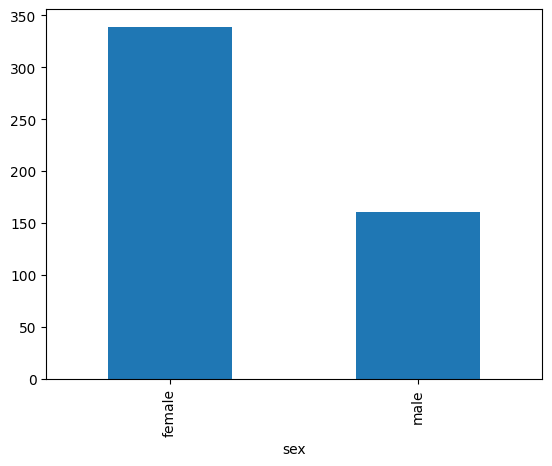

In [ ]:
# Creating visual for survival count of sex.
survived.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# Checking survival count of passenger class.
survived_pclass = survived.groupby('pclass').survived.count()
survived_pclass

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [ ]:
# Checking survival percentage of passenger class.
percent_survived_class = (survived_pclass / len(survived)) * 100
percent_survived_class

pclass
1    40.0
2    23.8
3    36.2
Name: survived, dtype: float64

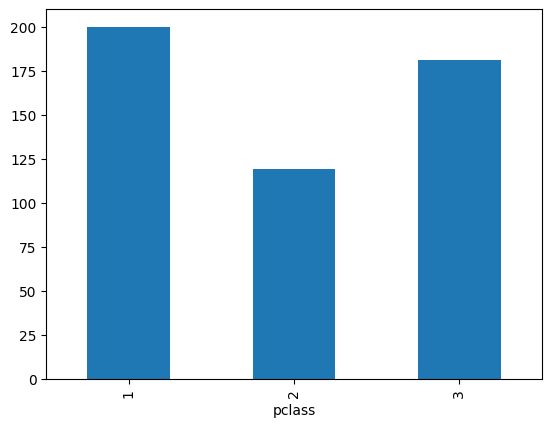

In [ ]:
# Creating visual for survival count of passenger class.
survived.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# Checking survival count of adults and children.
survived_age_b = survived.groupby('age_b').survived.count()
survived_age_b

age_b
Adult    439
Child     61
Name: survived, dtype: int64

In [ ]:
# Checking survival percentage of adults and children.
survived_percent_age = (survived_age_b / len(survived)) * 100
survived_percent_age

age_b
Adult    87.8
Child    12.2
Name: survived, dtype: float64

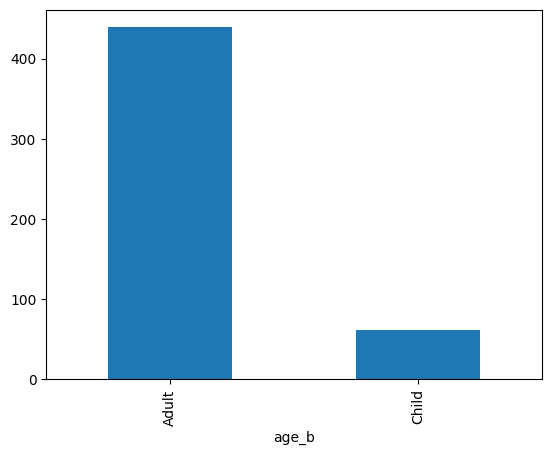

In [ ]:
# Creating visual for survival count of adults and children.
survived.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

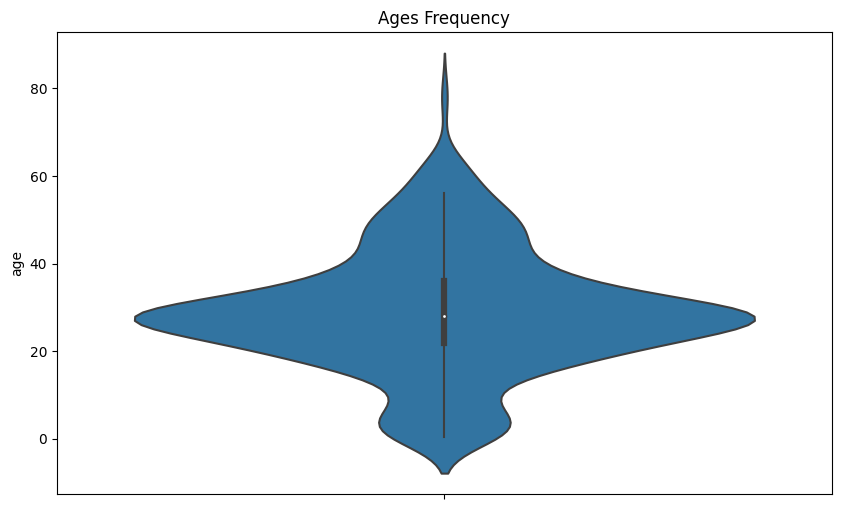

In [ ]:
# Visual of ages that survived.
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["age"])
plt.show()

In [ ]:
# Checking the maximum age that survived.
survived_max_age = survived.age.max()
survived_max_age

80.0

In [ ]:
# Checking the minimum age that survived.
survived_min_age = survived.age.min()
survived_min_age

0.1667

In [ ]:
# Checking the medium age that survived.
survived_median_age = survived.age.median()
survived_median_age

28.0

In [ ]:
# Checking the average age that survived.
survived_most_age = survived.age.mode()
survived_most_age

0    28.0
Name: age, dtype: float64

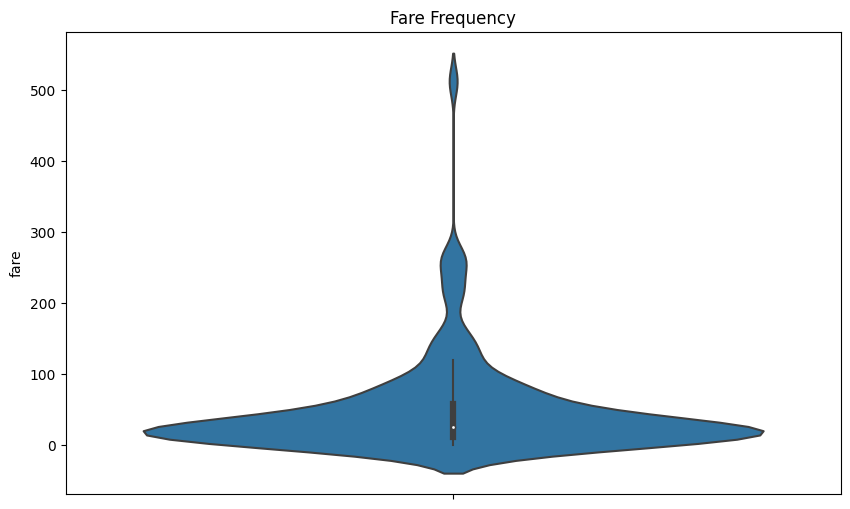

In [ ]:
# Visual of fares that survived.
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["fare"])
plt.show()

In [ ]:
# Checking the maximum of fare that survived.
survived_max_fare = survived.fare.max()
survived_max_fare

512.33

In [ ]:
# Checking the minimum of fare that survived.
survived_min_fare = survived.fare.min()
survived_min_fare

0.0

In [ ]:
# Checking the medium of fare that survived.
survived_median_fare = survived.fare.median()
survived_median_fare

26.0

In [ ]:
# Checking the average of fare that survived.
survived_mode_fare = survived.fare.mode()
survived_mode_fare

0    26.0
Name: fare, dtype: float64

In [ ]:
# Need to change male and female to number values. Male is 1 and female is 2.
sex1={'male':1, 'female':2}
data.sex=data.sex.map(sex1)

In [ ]:
# Need to change adult and child to number values. Adult is 1 and child is 2.
age1={'Adult':1, 'Child':2}
data.age_b=data.age_b.map(age1)

In [ ]:
# Changing age and fare into integars.
data.age = data.age.astype(int)
data.fare = data.fare.astype(int)

In [ ]:
# Checking data.
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,2,29,1,211
1,2,1,1,1,0,2,151
2,3,1,0,2,2,2,151
3,4,1,0,1,30,1,151
4,5,1,0,2,25,1,151
...,...,...,...,...,...,...,...
1304,1305,3,0,2,14,2,14
1305,1306,3,0,2,28,1,14
1306,1307,3,0,1,26,1,7
1307,1308,3,0,1,27,1,7


In [ ]:
# Setting up y and X values.
y = data["survived"]
features = ["pclass", "sex", "age", "age_b", "fare"]
X = data[features]

In [ ]:
# 2D graph

# sklearn.preprosccesing provides utility functions and transformer classes.
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(1309, 5)

In [ ]:
# Finding the average and standard deviation.
np.mean(X),np.std(X)

(-1.0422017209009873e-16, 1.0)

In [ ]:
# Creating feature array.
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3', 'feature4']

In [ ]:
# Displaying rows and feature columns.
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4
0,-1.546098,1.344995,-0.037511,-0.301386,3.443743
1,-1.546098,-0.743497,-2.283521,3.318008,2.283876
2,-1.546098,1.344995,-2.128624,3.318008,2.283876
3,-1.546098,-0.743497,0.039937,-0.301386,2.283876
4,-1.546098,1.344995,-0.347306,-0.301386,2.283876
...,...,...,...,...,...
1304,0.841916,1.344995,-1.199241,3.318008,-0.364485
1305,0.841916,1.344995,-0.114960,-0.301386,-0.364485
1306,0.841916,-0.743497,-0.269857,-0.301386,-0.499803
1307,0.841916,-0.743497,-0.192409,-0.301386,-0.499803


In [ ]:
# sklearn.decomposition is a linear dimensionality reduction technique.
from sklearn.decomposition import PCA

pca_insurance = PCA(n_components=2)
principalComponents_insurance = pca_insurance.fit_transform(X)

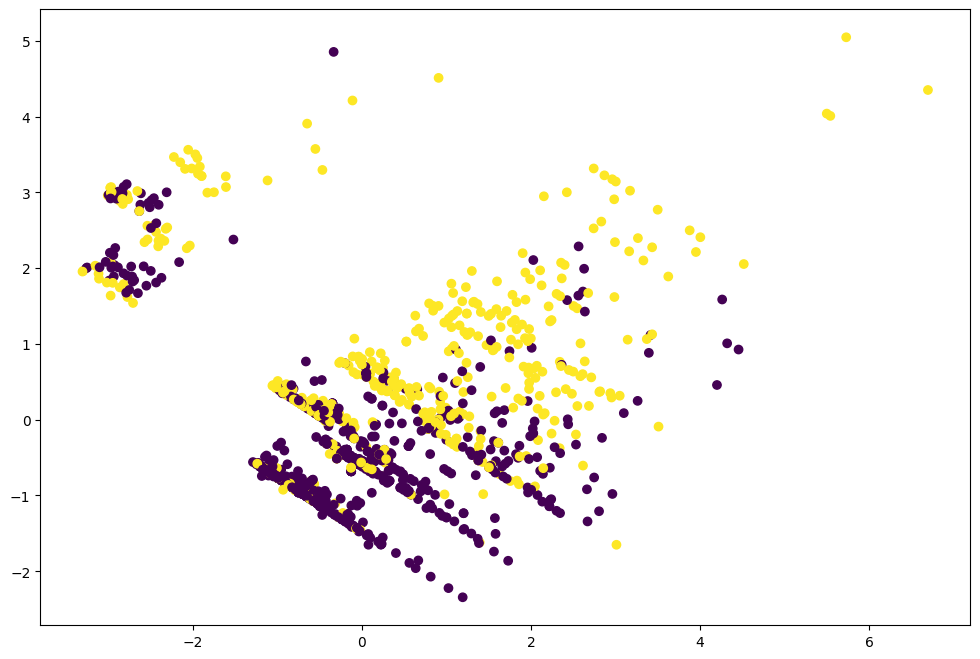

In [ ]:
# Visual figure.
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_insurance[:, 0], principalComponents_insurance[:, 1], c = y, alpha = 1)

In [ ]:
# Spliting the training file for training and testing.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1178, 5), (1178,), (131, 5), (131,))

In [ ]:
# Radius neighbours.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(RandomForestClassifier(n_estimators=300, random_state=1, class_weight='balanced')).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8955857385398981


In [ ]:
# Predict and validation set.
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.8320610687022901


In [ ]:
# Creating a confusion matrix.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[69, 12],
       [10, 40]])

In [ ]:
# Actual and predicted data frame.
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
141,1,1
934,1,0
603,1,1
906,0,0
1117,0,0
...,...,...
595,0,0
539,0,0
137,1,1
1134,0,0


In [ ]:
# Plot errors
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

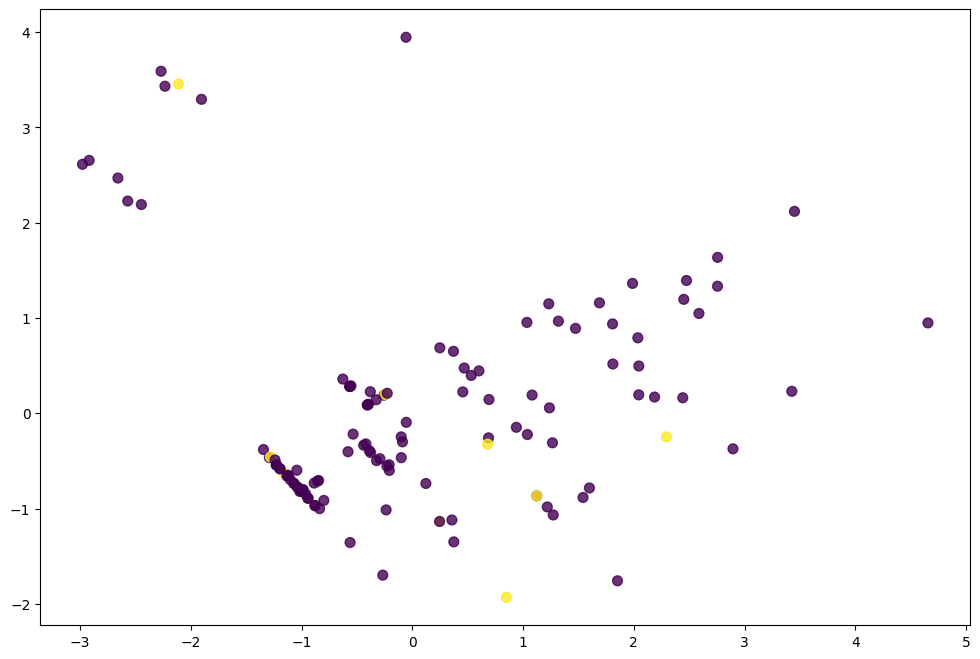

In [ ]:
# Visual figure
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)

In [ ]:
# KMeans clustering

In [ ]:
# Normalizing X
X = (X.max() - X) / (X.max() - X.min())

In [ ]:
# KMeans clusters data
from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters=2, max_iter=500, algorithm = 'auto',random_state=1)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=2, random_state=1)

In [ ]:
# Actual and prediction
correct = 0

prediction = kmeans.predict(X)

pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

      actual  prediction
0          1           1
1          1           1
2          0           1
3          0           1
4          0           1
...      ...         ...
1304       0           0
1305       0           0
1306       0           0
1307       0           0
1308       0           0

[1309 rows x 2 columns]


In [ ]:
# References:

# Tracyrenee. (Jul 22, 2021). Using KMeans clustering to predict survivors of the Titanic. 
   # Retrieved from https://medium/mlearning-ai/using-kmeans-clustering-to-to-predict-survivors-of-the-titanic-ae3d3e959eb8

# TracyRenee61. (Jul 21, 2021). Total_Titanic_Data_Analysis_Clustering.ipynb.
   # Retrieved from https://github.com/TracyRenee61/Titanic-Datasets/blob/master/Total_Titanic_Data_Analysis_Clustering.ipynb

# Pandas. (Apr 03, 2023). Pandas documentation.
   # Retrieved from https://pandas.pydata.org/docs/

# NumPy. (N.D.). What is NumPy? 
   # Retrieved from https://numpy.org/doc/stable/user/whatisnumpy.html

# GeeksforGeeks. (Jun 03, 2020). Introduction to Seaborn - Python.
   # Retrieved from https://www.geeksforgeeks.org/introduction-to-seaborn-python/

# Scikit Learn. (N.D.). 6.3. Preprocessing data.
   # Retrieved from https://scikit-learn.org/stable/modules/preprocessing.html

# Scikit Learn. (N.D.). sklearn.decomposition.PCA.
   # Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html